# Лабораторна робота №1. Дослiдження бiблiотек та фреймворкiв для комп’ютерної обробки зображень

**Виконала** студентка групи КІ-51мп Додонова Марія

**Мета:** Ознайомитися з програмними iнструментами (бiблiотеками, фреймворками) для обробки зображень, дослiдити та реалiзувати операцiю згортки, а також навчитися виконувати попередню обробку зображень, включаючи застосування фiльтрiв та методiв нормалiзацiї.

## Порядок виконання

1. Реалiзувати операцiю 2D згортки для матрицi "з нуля" за допомогою NumPy. Ваша функцiя повинна приймати на вхiд матрицю, ядро, а також параметри 'stride' та 'padding'.

2. Обрати будь-яке кольорове зображення. Зчитати його за допомогою бiблiотеки cv2 командою cv2.imread. Пам’ятайте, що cv2 зчитує зображення у колiрному просторi BGR. Для коректної вiзуалiзацiї за допомогою Matplotlib може знадобитися конвертацiя в RGB.

3. Для подальшої роботи використовуйте фреймворк TensorFlow або PyTorch. Реалiзуйте наступнi пункти саме за допомогою обраного фреймворку.

4. Створити ядра для фiльтра Гауса, box-фiльтра та unsharp masking. Застосувати їх до вашого зображення за допомогою операцiї згортки у вибраному фреймворку. Вiзуалiзувати оригiнальне та обробленi зображення. **Зауваження:** для кольорового зображення фiльтрацiю необхiдно застосовувати до кожного каналу (R, G, B) окремо.

5. *(За бажанням)* Реалiзувати видiлення границь на зображеннi за допомогою оператора Собеля. Обчислiть горизонтальний та вертикальний градiєнти та вiзуалiзуйте їхню магнiтуду.

6. Дослiдити методи нормалiзацiї. Виконати для вашого зображення min-max нормалiзацiю та стандартизацiю. Вiзуалiзувати результати.

## Виконання роботи

In [1]:
import sys, os

ROOT_PATH = os.path.abspath("..")
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    print("Inserted path!")

import numpy as np
import cv2
import torch

from src.utils import convolve, apply_filters
from src.plot_tools import imshow

Inserted path!


### 1. Реалiзувати операцiю 2D згортки для матрицi "з нуля"за допомогою NumPy. Ваша функцiя повинна приймати на вхiд матрицю, ядро, а також параметри 'stride' та 'padding'.

In [2]:
matrix = np.array([[45, 63, 27, 90, 34],
                   [36, 18, 81, 9, 87],
                   [9, 54, 72, 99, 56],
                   [83, 23, 12, 43, 54],
                   [27, 8, 19, 67, 69]])

kernel = np.ones((3, 3)) / 9

output = convolve(matrix, kernel, stride=(1, 1), padding=(0, 0))

# Show example
print("Matrix:")
print(matrix)
print("\nKernel:")
print(kernel)
print("\nOutput:")
print(output)

Matrix:
[[45 63 27 90 34]
 [36 18 81  9 87]
 [ 9 54 72 99 56]
 [83 23 12 43 54]
 [27  8 19 67 69]]

Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Output:
[[45.         57.         61.66666667]
 [43.11111111 45.66666667 57.        ]
 [34.11111111 44.11111111 54.55555556]]


### 2. Обрати будь-яке кольорове зображення. Зчитати його за допомогою бiблiотеки cv2 командою cv2.imread.
Пам’ятайте, що cv2 зчитує зображення у колiрному просторi BGR. Для коректної вiзуалiзацiї за допомогою Matplotlib може знадобитися конвертацiя в RGB.

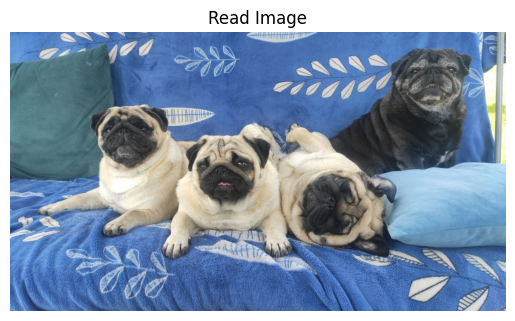

In [3]:
# Read the image (in BGR format)
image_np = cv2.imread(os.path.join(ROOT_PATH, "data", "lab1", "pugs.jpg"))

# Convert the image to RGB
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

# Show the image
imshow(image_np, "Read Image")

### 3. Для подальшої роботи використовуйте фреймворк TensorFlow або PyTorch. Реалiзуйте наступнi пункти саме за допомогою обраного фреймворку.

In [4]:
# Convert the image to torch tensor with float32 data type
image_torch = torch.from_numpy(image_np).float()

# Change the shape to (B, C, H, W)
image_torch = image_torch.permute(2, 0, 1).unsqueeze(0)

### 4. Створити ядра для фiльтра Гауса, box-фiльтра та unsharp masking. Застосувати їх до вашого зображення за допомогою операцiї згортки у вибраному фреймворку. Вiзуалiзувати оригiнальне та обробленi зображення.
**Зауваження:** для кольорового зображення фiльтрацiю необхiдно застосовувати до кожного каналу (R, G, B) окремо.

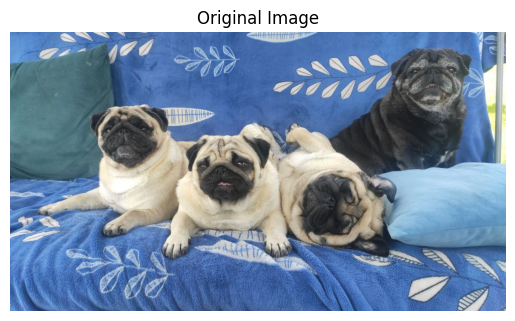

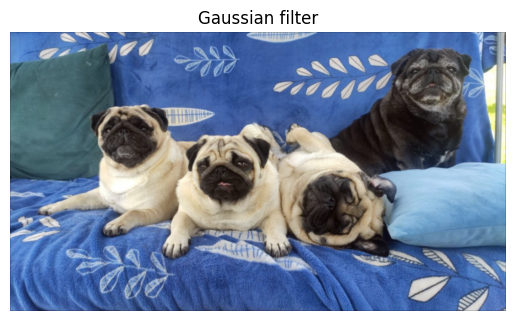

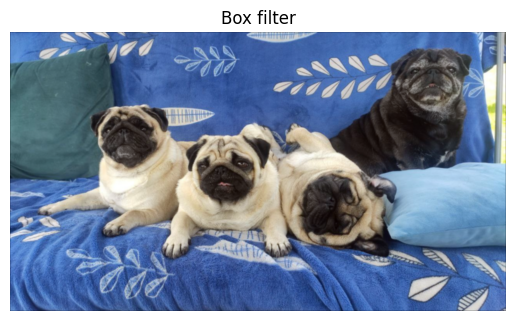

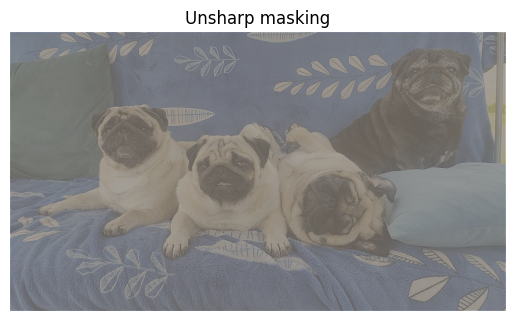

In [5]:
# Define Gaussian filter
coords = torch.tensor(
    [[2, 1, 2],
     [1, 0, 1],
     [2, 1, 2]], dtype=torch.float32) # x**2 + y**2
sigma = 1.5
gaussian = torch.exp(-coords / (2 * sigma**2)) / (2 * torch.pi * sigma**2)
gaussian = gaussian.view(1, 1, 3, 3)

# Define box filter
box = torch.ones((1, 1, 3, 3)) / 9

# Define unsharp masking filter
unsharp = torch.tensor([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]], dtype=torch.float32)
unsharp = unsharp.view(1, 1, 3, 3)

filters = {
    "Gaussian filter": gaussian,
    "Box filter": box,
    "Unsharp masking": unsharp
}

# Apply filters
results = apply_filters(image_torch, filters)

# Visualize results
imshow(image_np, "Original Image")
for filter in results:
    imshow(results[filter], filter)

### 5. *(За бажанням)* Реалiзувати видiлення границь на зображеннi за допомогою оператора Собеля. Обчислiть горизонтальний та вертикальний градiєнти та вiзуалiзуйте їхню магнiтуду.

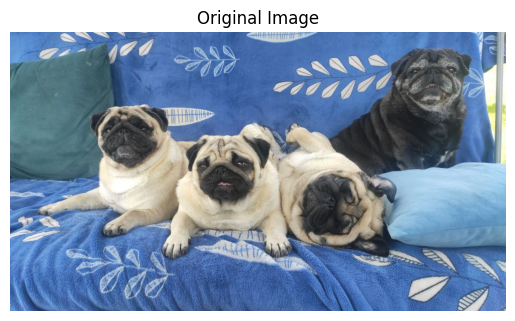

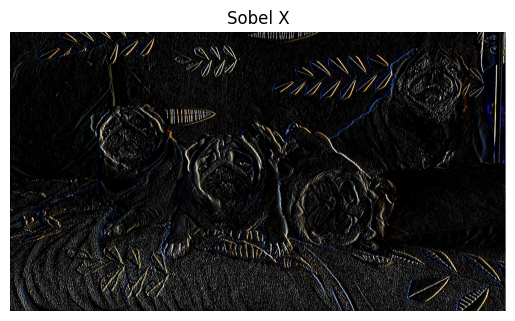

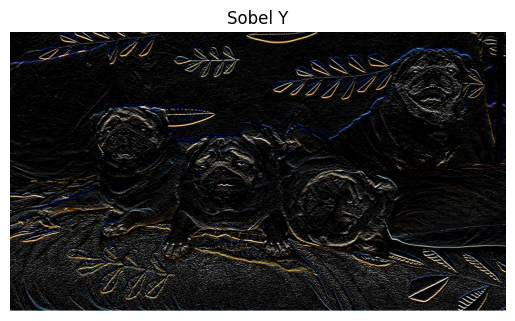

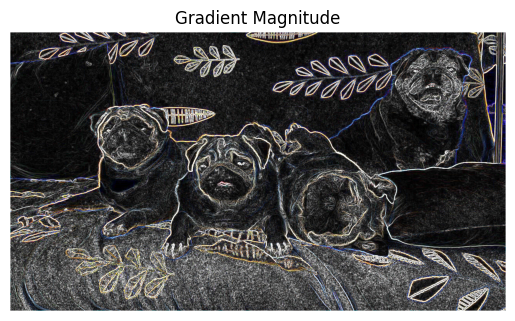

In [6]:
# Define Sobel X filter
sobel_x = torch.tensor([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]], dtype=torch.float32)
sobel_x = sobel_x.view(1, 1, 3, 3)

# Define Sobel Y filter
sobel_y = torch.tensor([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]], dtype=torch.float32)
sobel_y = sobel_y.view(1, 1, 3, 3)

sobel_filters = {
    "Sobel X": sobel_x,
    "Sobel Y": sobel_y
}

# Apply Sobel filters
sobel_results = apply_filters(image_torch, sobel_filters, to_numpy=False)
sobel_results["Gradient Magnitude"] = torch.sqrt(
    sobel_results["Sobel X"]**2 + sobel_results["Sobel Y"]**2
)

# Compute gradient magnitude
sobel_results = {k: v.numpy().clip(0, 255).astype("uint8") for k, v in sobel_results.items()}

# Visualize results
imshow(image_np, "Original Image")
for filter in sobel_results:
    imshow(sobel_results[filter], filter)

### 6. Дослiдити методи нормалiзацiї. Виконати для вашого зображення min-max нормалiзацiю та стандартизацiю. Вiзуалiзувати результати.

In [7]:
# Min-max normalization
min_v = torch.amin(image_torch, dim=(2, 3)).view(1, 3, 1, 1)
max_v = torch.amax(image_torch, dim=(2, 3)).view(1, 3, 1, 1)
normalized_image = (image_torch - min_v) / (max_v - min_v)

# Image standardization
mean = image_torch.mean(dim=(2, 3)).view(1, 3, 1, 1)
std = image_torch.std(dim=(2, 3)).view(1, 3, 1, 1)
standardized_image = (image_torch - mean) / std

print(f"Original Image:\n{image_torch[:, :2, :2]}\n")
print(f"After Min-Max Normalization:\n{normalized_image[:, :2, :2]}\n")
print(f"After Standardization:\n{standardized_image[:, :2, :2]}")

Original Image:
tensor([[[[ 91.,  85.,  83.,  ..., 163., 154., 145.],
          [ 90.,  84.,  83.,  ..., 158., 149., 139.]],

         [[138., 132., 130.,  ..., 169., 163., 154.],
          [137., 131., 130.,  ..., 164., 158., 148.]]]])

After Min-Max Normalization:
tensor([[[[0.3569, 0.3333, 0.3255,  ..., 0.6392, 0.6039, 0.5686],
          [0.3529, 0.3294, 0.3255,  ..., 0.6196, 0.5843, 0.5451]],

         [[0.5145, 0.4896, 0.4813,  ..., 0.6432, 0.6183, 0.5809],
          [0.5104, 0.4855, 0.4813,  ..., 0.6224, 0.5975, 0.5560]]]])

After Standardization:
tensor([[[[-0.2483, -0.3523, -0.3870,  ...,  1.0002,  0.8442,  0.6881],
          [-0.2656, -0.3696, -0.3870,  ...,  0.9135,  0.7575,  0.5841]],

         [[ 0.1920,  0.0727,  0.0330,  ...,  0.8084,  0.6891,  0.5101],
          [ 0.1721,  0.0528,  0.0330,  ...,  0.7090,  0.5897,  0.3908]]]])


## Висновок

В ході виконання роботи було розроблено функцію для виконання згортки матриці, створено та застосовано до зображення власні фільтр Гаусса, box-фільтр та unsharp masking. Також було видiлено границі на зображеннi за допомогою оператору Собеля та виконано нормалізацію та стандартизацію зображення.